In this notebook, we will perform the following overall analysis:

    - Number of Uber rides per Hour;
    - Number of Uber rides per Day of the Month;
    - Number of Uber rides per Day of the Week;
    - Percentage of Uber rides on Weekdays vs Weekends;
    - Number of Uber rides per day in Weekdays vs Weekends.

Next, we perform analysis between the data of the different months:

    - Number of Uber rides per Month;
    - Number of Uber rides per Hour and Month;
    - Number of Uber rides per Day of the Week and Month.

Additionally, we seperate the data from the Uber rides taken inside and outside of Manhattan and perform the following analysis:

    - Percentage of Uber rides inside and outside of Manhattan;
    - Number of Uber rides per Hour and Zone.


Finally, we perform analysis between the number of Uber rides and other FHV companies:

    - Ratio and number of rides per Company;
    - Number of rides per Hour and Company.

# Imports

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import folium

# Overall Analysis of Uber rides from April-September 2014

## Data Loading, Preparation and Visualization 

Load the data of each month into a DataFrame and concatenate into a single one.

In [47]:
df_apr14 = pd.read_csv('../data/uber-raw-data-apr14.csv')
df_may14 = pd.read_csv('../data/uber-raw-data-may14.csv')
df_jun14 = pd.read_csv('../data/uber-raw-data-jun14.csv')
df_jul14 = pd.read_csv('../data/uber-raw-data-jul14.csv')
df_aug14 = pd.read_csv('../data/uber-raw-data-aug14.csv')
df_sep14 = pd.read_csv('../data/uber-raw-data-sep14.csv')

df = pd.concat([df_apr14,df_may14,df_jun14,df_jul14,df_aug14,df_sep14])

Check for missing values and the data types of each category.

In [ ]:
df.info()

Perform a quick dataset description to check for the mean lattitude and longitude values, as well as other values.

In [ ]:
df.describe()

Separate the day and time into seperate categories (month-day-weekday-hour.)

In [48]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['month'] = df['Date/Time'].dt.month
df['day'] = df['Date/Time'].dt.day
df['weekday'] = df['Date/Time'].dt.weekday
df['hour'] = df['Date/Time'].dt.hour

df

Date/Time      Lat      Lon    Base  month  day  weekday  \
0       2014-04-01 00:11:00  40.7690 -73.9549  B02512      4    1        1   
1       2014-04-01 00:17:00  40.7267 -74.0345  B02512      4    1        1   
2       2014-04-01 00:21:00  40.7316 -73.9873  B02512      4    1        1   
3       2014-04-01 00:28:00  40.7588 -73.9776  B02512      4    1        1   
4       2014-04-01 00:33:00  40.7594 -73.9722  B02512      4    1        1   
...                     ...      ...      ...     ...    ...  ...      ...   
1028131 2014-09-30 22:57:00  40.7668 -73.9845  B02764      9   30        1   
1028132 2014-09-30 22:57:00  40.6911 -74.1773  B02764      9   30        1   
1028133 2014-09-30 22:58:00  40.8519 -73.9319  B02764      9   30        1   
1028134 2014-09-30 22:58:00  40.7081 -74.0066  B02764      9   30        1   
1028135 2014-09-30 22:58:00  40.7140 -73.9496  B02764      9   30        1   

         hour  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1028131    22  
1028132    22  
1028133    22  
1028134    22  
1028135    22  

[4534327 rows x 8 columns]

## Data Analysis and Exploration

### 1.1 Number of Uber rides per Hour.

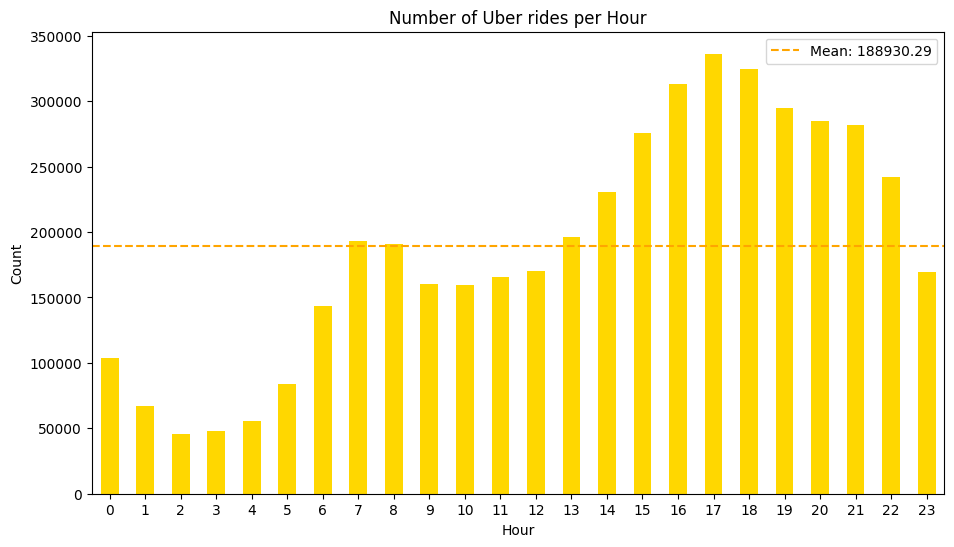

In [88]:
hours_counts = df['hour'].value_counts(sort=False)
hours_counts_mean = hours_counts.sum()/df['hour'].nunique()

plt.figure(figsize=(11,6))
hours_counts.plot(kind='bar', color='gold')
mean_line = plt.axhline(hours_counts_mean, color='orange', linestyle='--', label=f'Mean: {hours_counts_mean:.2f}')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Number of Uber rides per Hour')
plt.xticks(rotation=0)
plt.legend(handles=[mean_line])
plt.show()

### 1.2 Number of Uber rides per Day of the Month.

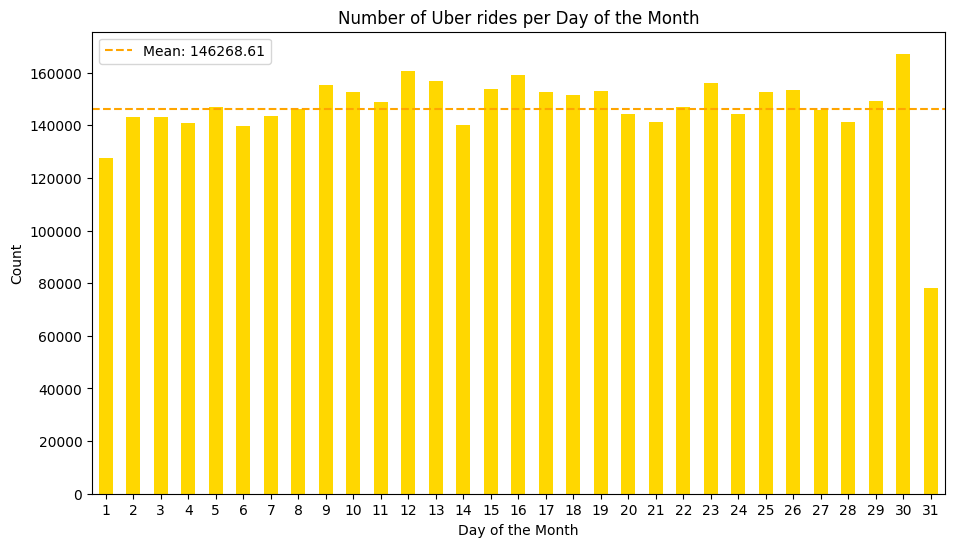

In [89]:
days_counts = df['day'].value_counts(sort=False)   # Get the counts of each day
days_counts_mean = days_counts.sum()/df['day'].nunique()

plt.figure(figsize=(11,6))
days_counts.plot(kind='bar', color='gold')
mean_line = plt.axhline(days_counts_mean, color='orange', linestyle='--', label=f'Mean: {days_counts_mean:.2f}')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('Number of Uber rides per Day of the Month')
plt.legend(handles=[mean_line])
plt.xticks(rotation=0)
plt.show()

### 1.3 Number of Uber rides per Day of the Week.

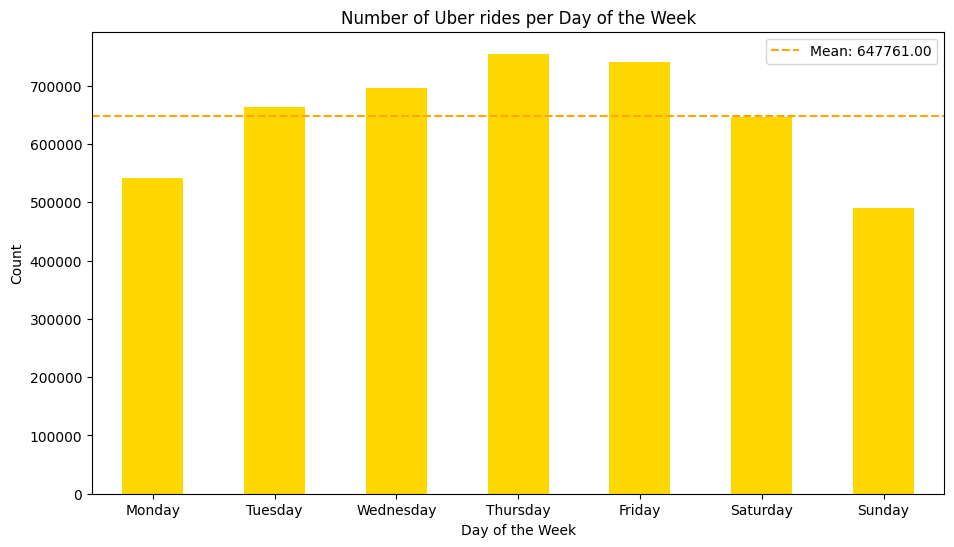

In [90]:
weekdays_counts = df['weekday'].value_counts(sort=False)

weekdays_counts_sorted = weekdays_counts.sort_index()
weekdays_dict = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

weekdays_counts_sorted_named = weekdays_counts_sorted.rename(index=weekdays_dict).reindex(list(weekdays_dict.values()))
weekdays_counts_mean = weekdays_counts.sum()/df['weekday'].nunique()

plt.figure(figsize=(11,6))
weekdays_counts_sorted_named.plot(kind='bar', color='gold')
mean_line = plt.axhline(weekdays_counts_mean, color='orange', linestyle='--', label=f'Mean: {weekdays_counts_mean:.2f}')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Number of Uber rides per Day of the Week')
plt.legend(handles=[mean_line])
plt.xticks(rotation=0)
plt.show()

### 1.4 Percentage of Uber rides on Weekdays vs Weekends

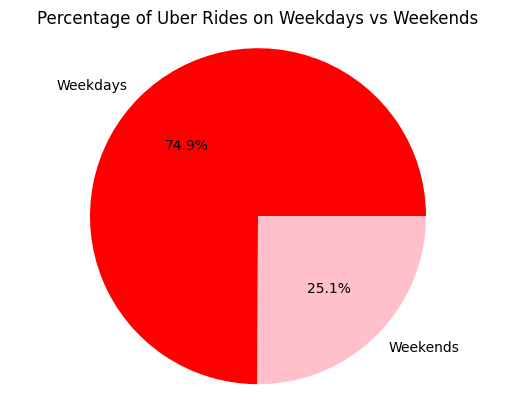

In [59]:
total_rides_weekdays = weekdays_counts_sorted.loc[[0,1,2,3,4]].sum()
total_rides_weekends = weekdays_counts_sorted.loc[[5,6]].sum()

plt.pie([total_rides_weekdays, total_rides_weekends], labels=['Weekdays','Weekends'], colors=['red','pink'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Uber Rides on Weekdays vs Weekends')
plt.show()

A large percentage of Uber rides occur on weekdays. However, this comparison is unfair because the weekend is shorter (2 days) compared to the workweek (5 days). Therefore, it is more meaningful to compare the average number of Uber rides per day during the workweek versus the weekend.

### 1.5 Number of Uber rides per day in Weekdays vs Weekends.

52


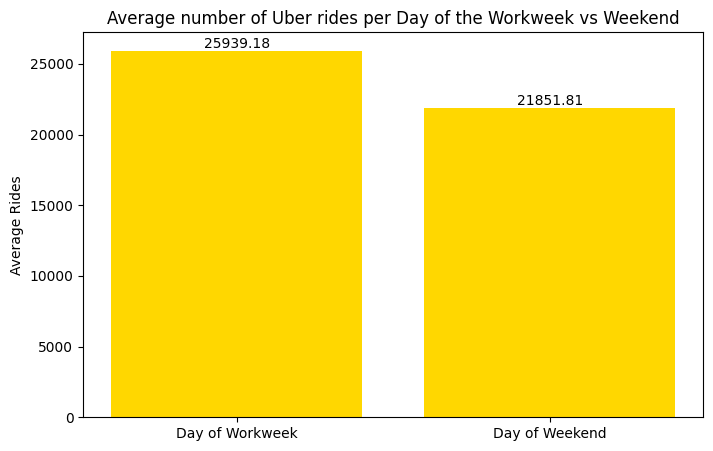

In [ ]:
total_rides_weekdays = weekdays_counts_sorted.loc[[0,1,2,3,4]].sum()
total_rides_weekends = weekdays_counts_sorted.loc[[5,6]].sum()

weekends = df[df['weekday'].isin([5, 6])]
unique_weekends_count = weekends[['month', 'day']].drop_duplicates().shape[0]
average_per_weekend = total_rides_weekends/unique_weekends_count

weekdays = df[df['weekday'].isin([0,1,2,3,4])]
unique_weedays_count = weekdays[['month', 'day']].drop_duplicates().shape[0]
average_per_weekday = total_rides_weekdays/unique_weedays_count


categories = ['Day of Workweek', 'Day of Weekend']
values = [average_per_weekday, average_per_weekend]
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color='gold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Average number of Uber rides per Day of the Workweek vs Weekend')
plt.ylabel('Average Rides')
plt.show()

This comparison is fair, as it accounts for the shorter duration of the weekend compared to the workweek. From the results, we can conclude that the average number of rides on weekdays surpasses that of weekends by approximately 4,000 rides per day. This notable difference highlights the higher demand for Uber rides during weekdays, likely driven by commuting and other work-related activities.

# Comparison Analysis between Uber rides from April-September 2014

Since the datasets used here as the same as the ones used in the previous section, we will omit the "Data Loading, Preparation and Visualization" step.

## Data Analysis and Exploration

### 2.1 Number of Uber rides per Month

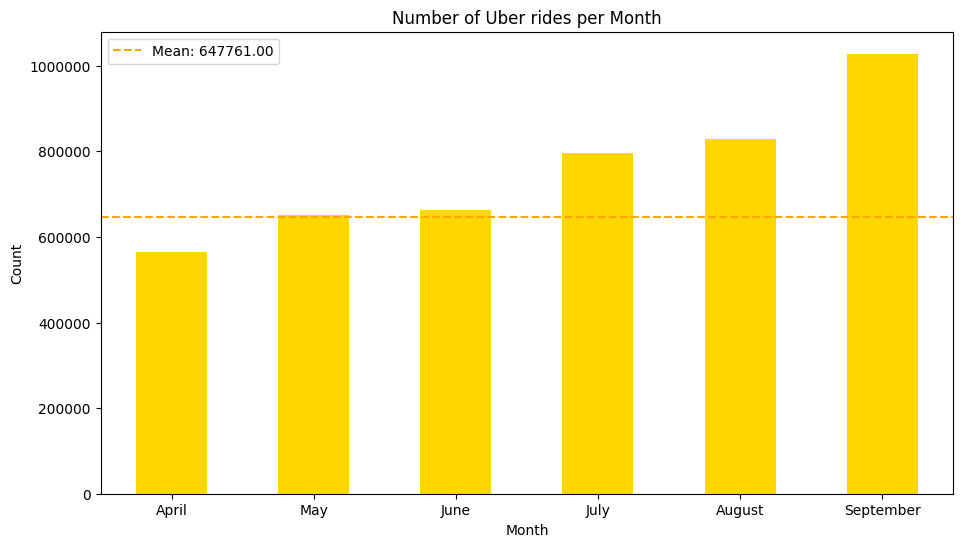

In [98]:
month_counts = df['month'].value_counts(sort=False)

month_dict = {
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
}

month_counts_named = month_counts.rename(index=month_dict).reindex(list(month_dict.values()))
month_counts_mean = weekdays_counts.sum()/df['weekday'].nunique()

plt.figure(figsize=(11,6))
month_counts_named.plot(kind='bar', color='gold')
mean_line = plt.axhline(month_counts_mean, color='orange', linestyle='--', label=f'Mean: {month_counts_mean:.2f}')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Uber rides per Month')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.legend(handles=[mean_line])
plt.show()

### 2.2 Number of Uber rides per Hour and Month

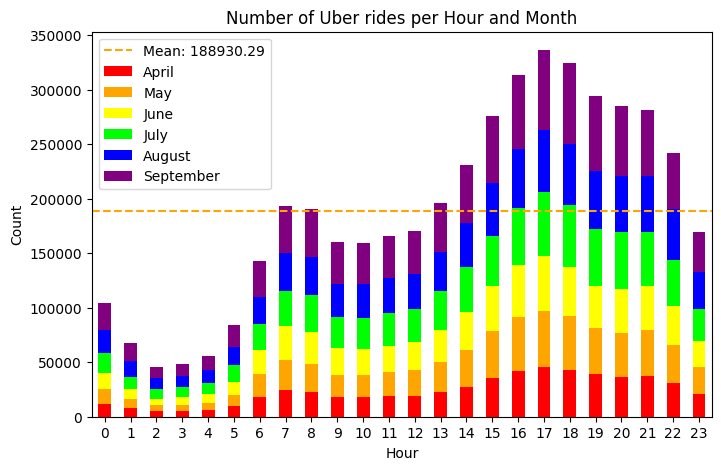

In [162]:
df_hour_month_grouped = df.groupby(['hour','month']).size().unstack(fill_value=0)

df_hour_month_grouped_named = df_hour_month_grouped.rename(columns=month_dict)


fig, ax = plt.subplots(figsize=(8, 5))
df_hour_month_grouped_named.plot(kind='bar', color=['red', 'orange', 'yellow', 'lime', 'blue', 'purple'], stacked=True, ax=ax)
mean_line = ax.axhline(hours_counts_mean, color='orange', linestyle='--', label=f'Mean: {hours_counts_mean:.2f}')
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Number of Uber rides per Hour and Month')
ax.set_xticks(range(len(df_hour_month_grouped_named)))
ax.set_xticklabels(df_hour_month_grouped_named.index, rotation=0)
ax.legend()
plt.show()

### 2.3 Number of Uber rides per Day of the Week and Month

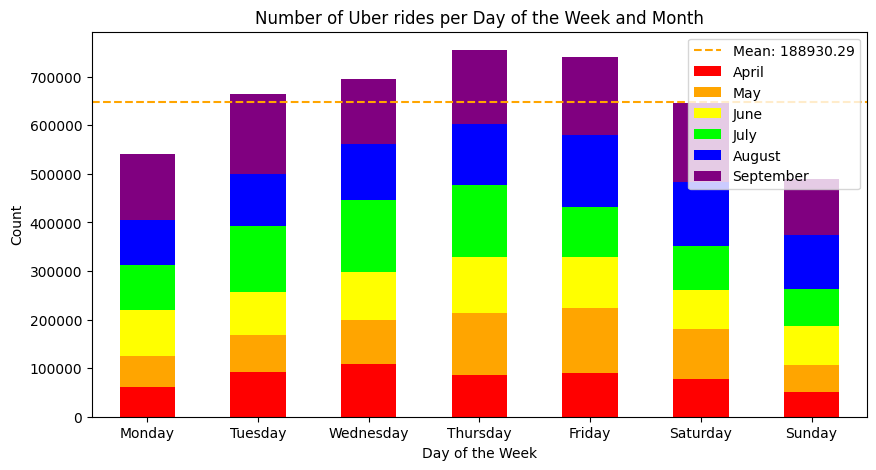

In [136]:
df_weekday_month_grouped = df.groupby(['weekday','month']).size().unstack(fill_value=0)
df_weekday_month_grouped_named = df_weekday_month_grouped.rename(columns=month_dict,index=weekdays_dict)

fig, ax = plt.subplots(figsize=(10, 5))
df_weekday_month_grouped_named.plot(kind='bar', color=['red', 'orange', 'yellow', 'lime', 'blue', 'purple'], stacked=True, ax=ax)
mean_line = ax.axhline(weekdays_counts_mean, color='orange', linestyle='--', label=f'Mean: {hours_counts_mean:.2f}')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count')
ax.set_title('Number of Uber rides per Day of the Week and Month')
ax.set_xticks(range(len(df_weekday_month_grouped_named)))
ax.set_xticklabels(df_weekday_month_grouped_named.index, rotation=0)
ax.legend()
plt.show()

# Comparison Analysis between Uber rides inside and outside of Manhattan

## Data Loading, Preparation and Visualization

We define approximate boundaries for the Manhattan area and create a new column to indicate whether each ride occurred inside or outside of Manhattan.

In [145]:
#Approximated manhattan boundaries
manhattan_bounds = {
    'lat_min': 40.700081,
    'lat_max': 40.806410,
    'lon_min': -74.013846,
    'lon_max':  -73.953250
}

df['is_manhattan'] = (
    (df['Lat'] > manhattan_bounds['lat_min']) & 
    (df['Lat'] < manhattan_bounds['lat_max']) & 
    (df['Lon'] > manhattan_bounds['lon_min']) & 
    (df['Lon'] < manhattan_bounds['lon_max'])
)

## Data Analysis and Exploration

Before going into the analysis, we create a scatter plot of a small sample of the locations where Uber pickups occurred. This can help visualize better if there are any areas where rides happen most often.

In [137]:
sample_df = df.sample(n=5000, random_state= np.random.seed())

nyc_map = folium.Map(
    max_bounds=True,
    location=[sample_df['Lat'].mean(), sample_df['Lon'].mean()], 
    zoom_start=12,
    min_lat=sample_df['Lat'].min(),
    min_lon=sample_df['Lon'].min(),
    max_lat=sample_df['Lat'].max(),
    max_lon=sample_df['Lon'].max()
)

marker_group = folium.FeatureGroup(name="Pickups")

for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=1,
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(marker_group)

# Add the marker group to the map
marker_group.add_to(nyc_map)
40.806410

manhattan_bounds = {
    'lat_min': 40.700081,
    'lat_max': 40.806410,
    'lon_min': -74.013846,
    'lon_max':  -73.953250
}

folium.CircleMarker([manhattan_bounds['lat_max'], manhattan_bounds['lon_min']], 
                    tooltip="Top-left Corner of Manhattan").add_to(nyc_map)
folium.CircleMarker([manhattan_bounds['lat_min'], manhattan_bounds['lon_min']], 
                    tooltip="Bottom-left Corner of Manhattan").add_to(nyc_map)
folium.CircleMarker([manhattan_bounds['lat_min'], manhattan_bounds['lon_max']], 
                    tooltip="Bottom-right Corner of Manhattan").add_to(nyc_map)
folium.CircleMarker([manhattan_bounds['lat_max'], manhattan_bounds['lon_max']], 
                    tooltip="Top-right Corner of Manhattan").add_to(nyc_map)


# Display the map
nyc_map

### 3.1 Percentage of Uber rides inside and outside of Manhattan

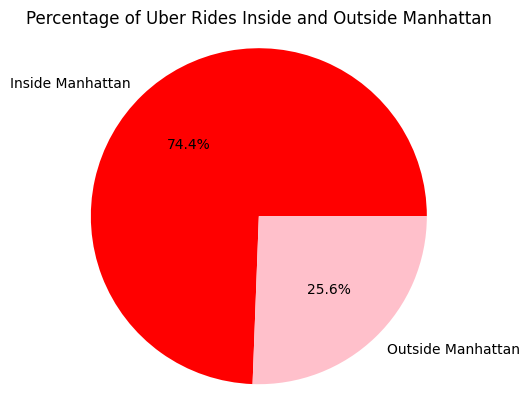

In [149]:
manhattan_rides_count = df['is_manhattan'].sum()
non_manhattan_rides_count = (~df['is_manhattan']).sum()

plt.pie([manhattan_rides_count,non_manhattan_rides_count], labels=['Inside Manhattan','Outside Manhattan'], colors=['red','pink'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Uber Rides Inside and Outside Manhattan')
plt.show()

### 3.2 Number of Uber rides per Hour and Zone.


In [169]:
manhattan_dict = {True : 'Inside Manhattan',
                  False : 'Outside Manhattan'}

df_hour_manhattan_grouped = df.groupby(['hour','is_manhattan']).size().unstack(fill_value=0)
df_hour_manhattan_grouped_named = df_hour_manhattan_grouped.rename(columns=manhattan_dict)

fig, ax = plt.subplots(figsize=(8, 5))
df_hour_manhattan_grouped_named.plot(kind='bar', color=['blue', 'green'], stacked=True, ax=ax)
mean_line = ax.axhline(hours_counts_mean, color='orange', linestyle='--', label=f'Mean: {hours_counts_mean:.2f}')
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Number of Uber rides per Hour and Month')
ax.set_xticks(range(len(df_hour_month_grouped_named)))
ax.set_xticklabels(df_hour_month_grouped_named.index, rotation=0)
ax.legend()
plt.show()

To complement the previous plot, we can construct a table showing the percentage of Uber rides for each zone per hour.

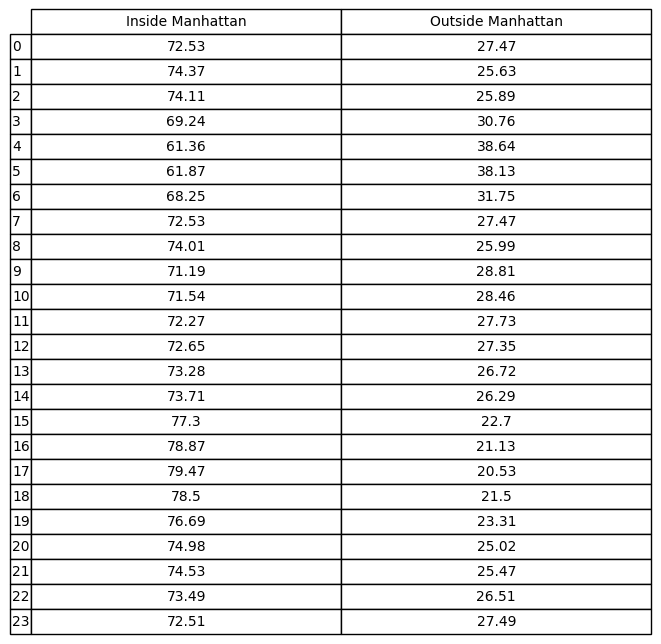

In [174]:
df_hour_manhattan_percentage = df_hour_manhattan_grouped_named.div(df_hour_manhattan_grouped_named.sum(axis=1), axis=0) * 100
table_data = df_hour_manhattan_percentage[['Inside Manhattan', 'Outside Manhattan']].round(2)

fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')

table = plt.table(cellText=table_data.values, colLabels=table_data.columns, rowLabels=table_data.index, loc='center', cellLoc='center', colLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.show()

Since the number of rides outside of Manhattan is inferior relative to inside, these can deviate from the norm of the plots previously drawn (number of rides per hour, etc). Having this in mind, we perform similar analysis to the one done previously to the whole dataset, but only for the rides outside manhattan

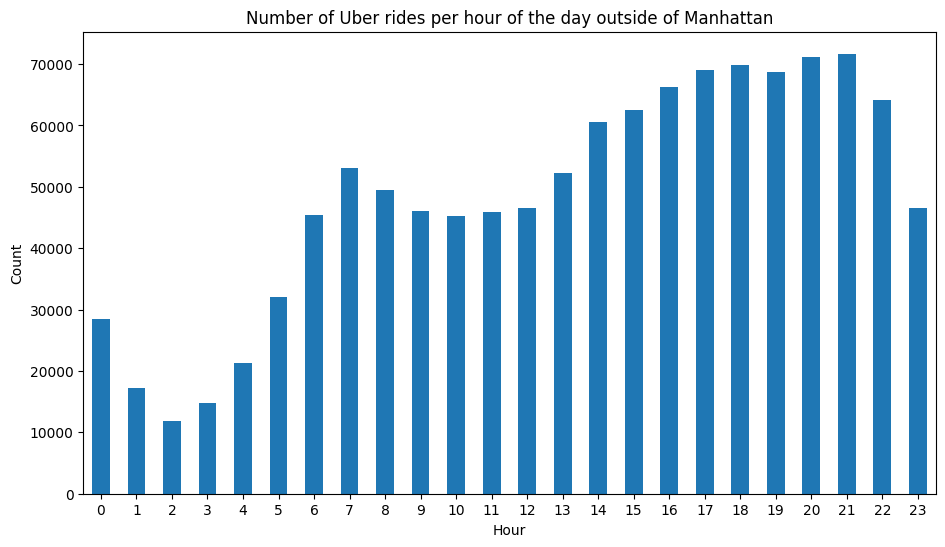

In [175]:
outside_manhattan_df = df[~((df['Lat'] >= manhattan_bounds['lat_min']) & 
                            (df['Lat'] <= manhattan_bounds['lat_max']) & 
                            (df['Lon'] >= manhattan_bounds['lon_min']) & 
                            (df['Lon'] <= manhattan_bounds['lon_max']))].copy()

# Create a Series containing only the Date/Time of the rides
outside_manhattan_df['Date/Time'] = pd.to_datetime(outside_manhattan_df['Date/Time'])
outside_manhattan_df['hours'] = outside_manhattan_df['Date/Time'].dt.hour

# Sort the DataFrame by hour
outside_manhattan_df_sorted = outside_manhattan_df.sort_values(by='hours')

# Count the number of occurrences for each hour
hours_count = outside_manhattan_df_sorted['hours'].value_counts(sort=False)

# Plotting
plt.figure(figsize=(11, 6))
hours_count.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Number of Uber rides per hour of the day outside of Manhattan')
plt.xticks(rotation=0)
plt.show()

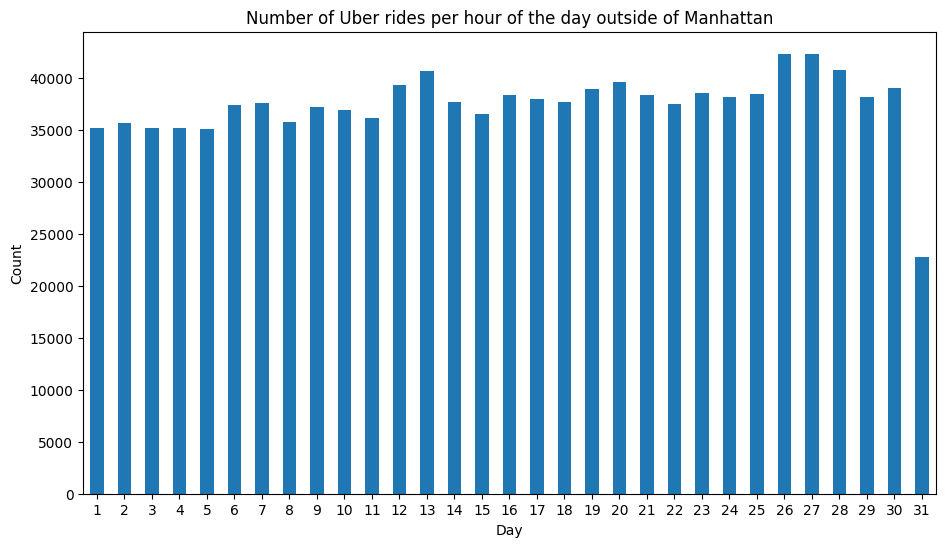

In [176]:
outside_manhattan_df['days'] = outside_manhattan_df['Date/Time'].dt.day

# Sort the DataFrame by hour
outside_manhattan_df_sorted = outside_manhattan_df.sort_values(by='days')

# Count the number of occurrences for each hour
hours_count = outside_manhattan_df_sorted['days'].value_counts(sort=False)

# Plotting
plt.figure(figsize=(11, 6))
hours_count.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Number of Uber rides per hour of the day outside of Manhattan')
plt.xticks(rotation=0)
plt.show()

By comparing the plots, the riders outside of manhattan follow a similar pattern to the ones inside of manhattan in terms of number of rides per hour of the day. However, in terms of the number of rides per day of the month, the peaks observed on the previous plot are a lot more smoothned in this plot